In [1]:
import os
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
pd.set_option('display.max_columns', 500)

sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
#mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
# print('Matplotlib version: ', mpl.__version__) # >= 2.0.

In [62]:
orders = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/Orders.csv')
df_orders = orders.copy()

In [3]:
member = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/Member.csv')
df_members = member.copy()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ECoupon = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/ECoupon.csv')
df_ECoupon = ECoupon.copy()

In [5]:
PromotionConditions = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/PromotionConditions.csv')
df_PromotionConditions = PromotionConditions.copy()

In [6]:
PromotionOrders = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/PromotionOrders.csv')
df_PromotionOrders = PromotionOrders.copy()

### Member 

In [7]:
df_members.head()

,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList
0,1587633,NaN,NaN,Web,2016-08-05 19:45:59.670,NaN,0,0,NaN
1,1587634,NaN,NaN,Web,2016-10-27 21:25:22.907,NaN,0,0,NaN
2,1587658,NaN,NaN,Web,2015-08-11 19:11:09.030,NaN,0,0,NaN
3,1587809,NaN,NaN,Web,2015-08-11 19:53:32.397,NaN,0,0,NaN
4,1587830,NaN,NaN,Web,2017-06-03 17:33:03.987,NaN,0,0,NaN


In [8]:
df_members.describe(include='all')

,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList
count,8.591460e+05,237275,237276,829143,859146,562300,859146.000000,859146.000000,1004
unique,NaN,15096,2,3,834059,1076,NaN,NaN,2
top,NaN,1996-09-20,Female,Web,2015-07-14 16:38:27.753,2016-11-11,NaN,NaN,是
freq,NaN,70,234540,624375,1771,2462,NaN,NaN,680
mean,2.401128e+06,NaN,NaN,NaN,NaN,NaN,1028.080041,464.840006,NaN
std,1.605855e+06,NaN,NaN,NaN,NaN,NaN,2385.726182,849.534746,NaN
min,1.321000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1.117701e+06,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,2.134418e+06,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,3.505592e+06,NaN,NaN,NaN,NaN,NaN,467.000000,0.000000,NaN


In [9]:
df_members.info()
#memberID沒有缺漏值，但不確定是會員（有主動註冊）還是有購物者就會自動補ID --> 應該是都有註冊，但有註冊不代表有開卡禮，要填資料才有

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859146 entries, 0 to 859145
Data columns (total 9 columns):
MemberId                   859146 non-null int64
Birthday                   237275 non-null object
GenderTypeDef              237276 non-null object
RegisterSourceTypeDef      829143 non-null object
RegisterDateTime           859146 non-null object
MinOrderDate               562300 non-null object
OpenCardPresent            859146 non-null int64
LastBirthdayPresentYear    859146 non-null int64
IsInBlackList              1004 non-null object
dtypes: int64(3), object(6)
memory usage: 59.0+ MB


In [10]:
df_members['GenderTypeDef'].value_counts()
#發現男生非常少->可以忽略性別的差異，因為幾乎都是女生

Female    234540
Male        2736
Name: GenderTypeDef, dtype: int64

Web           624375
AndroidApp    109704
iOSApp         95064
Name: RegisterSourceTypeDef, dtype: int64


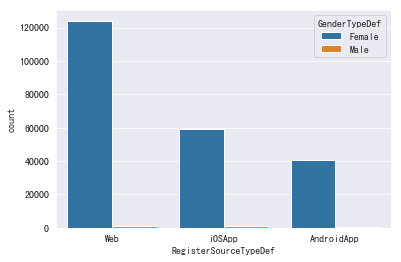

In [11]:
#註冊管道
print(df_members['RegisterSourceTypeDef'].value_counts())
sns.countplot(data = df_members, x = 'RegisterSourceTypeDef', hue='GenderTypeDef')
#高比例是web註冊，其次是IOS

#不同裝置單次購物金額是否有差？

In [12]:
#開卡禮
df_members['OpenCardPresent'].value_counts() #有624888個人沒有領開卡禮
#數字什麼意思？？promotion code??

0        624888
1078      11997
1292      11092
1838      10618
630       10577
2664      10531
8596      10311
544        9982
10342      9443
2577       9278
467        9040
1438       8551
2294       8378
2051       7922
5489       7771
4974       7702
8052       6955
1626       6950
7693       6862
5493       6103
10788      5812
4559       5701
812        5065
383        4986
9175       4865
3581       4729
5938       4729
7282       4265
961        4199
6547       3921
6879       3314
190        3267
4183       3262
318        3042
11428      1414
173        1168
127         370
98           86
Name: OpenCardPresent, dtype: int64

In [13]:
#根據有沒有領開卡禮設boolean
df_members.loc[df_members.OpenCardPresent == 0, 'get_OpenCardPresent'] = False
df_members.loc[df_members.OpenCardPresent != 0, 'get_OpenCardPresent'] = True
print(df_members['get_OpenCardPresent'].value_counts())

False    624888
True     234258
Name: get_OpenCardPresent, dtype: int64


0       661189
2017    111790
2018     86165
2016         2
Name: LastBirthdayPresentYear, dtype: int64
False    661189
True     197957
Name: get_LastBirthdayPresentYear, dtype: int64
get_OpenCardPresent  get_LastBirthdayPresentYear
False                False                          621898
                     True                             2990
True                 True                           194967
                     False                           39291
Name: get_LastBirthdayPresentYear, dtype: int64


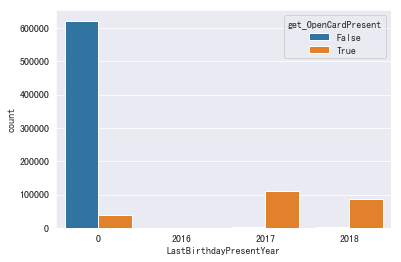

In [14]:
#領生日禮
print(df_members['LastBirthdayPresentYear'].value_counts() ) #有661189個人沒有領生日禮
sns.countplot(data = df_members, x = 'LastBirthdayPresentYear', hue='get_OpenCardPresent') 

#根據有沒有領生日禮設boolean
df_members.loc[df_members.LastBirthdayPresentYear == 0, 'get_LastBirthdayPresentYear'] = False
df_members.loc[df_members.LastBirthdayPresentYear != 0, 'get_LastBirthdayPresentYear'] = True
print(df_members['get_LastBirthdayPresentYear'].value_counts())

print(df_members.groupby('get_OpenCardPresent')['get_LastBirthdayPresentYear'].value_counts())
#沒有領開卡禮的人，也幾乎都沒有領生日禮
#有領開卡禮的人，有蠻多也有領生日禮 (約20萬人)-->是否真的有消費？有！約17萬有首購

In [15]:
#根據有沒有首購設boolean
df_members.loc[df_members.MinOrderDate.notnull() == False, 'MinOrder'] = False
df_members.loc[df_members.MinOrderDate.notnull() == True, 'MinOrder'] = True
df_members['MinOrder'].value_counts()

True     562300
False    296846
Name: MinOrder, dtype: int64

get_OpenCardPresent  get_LastBirthdayPresentYear  MinOrder
False                False                        True        360568
                                                  False       261330
                     True                         True          1980
                                                  False         1010
True                 False                        True         32072
                                                  False         7219
                     True                         True        167680
                                                  False        27287
Name: MinOrder, dtype: int64


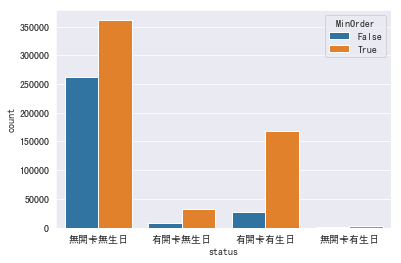

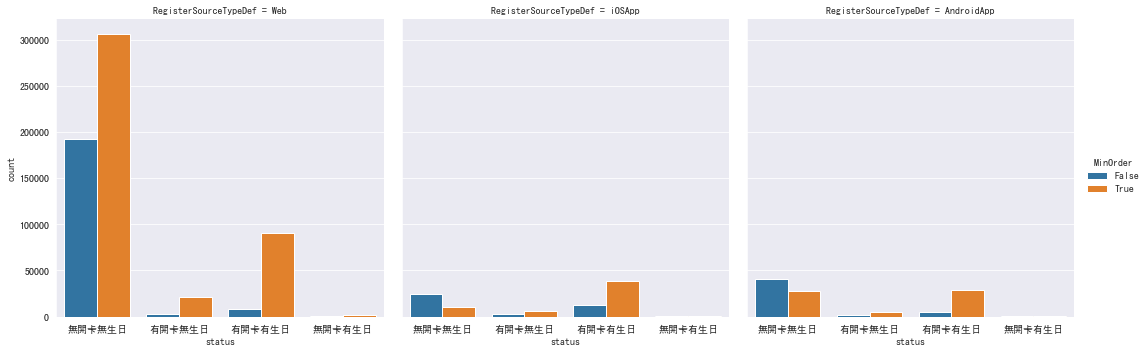

In [16]:
print(df_members.groupby(['get_OpenCardPresent','get_LastBirthdayPresentYear'])['MinOrder'].value_counts())

#把有無開卡禮和生日禮寫在一起
df_members.loc[(df_members.get_OpenCardPresent == True) & (df_members.get_LastBirthdayPresentYear == True), 'status'] = '有開卡有生日'
df_members.loc[(df_members.get_OpenCardPresent == True) & (df_members.get_LastBirthdayPresentYear == False), 'status'] = '有開卡無生日'
df_members.loc[(df_members.get_OpenCardPresent == False) & (df_members.get_LastBirthdayPresentYear == True), 'status'] = '無開卡有生日'
df_members.loc[(df_members.get_OpenCardPresent == False) & (df_members.get_LastBirthdayPresentYear == False), 'status'] = '無開卡無生日'

sns.countplot(data = df_members, x = 'status', hue='MinOrder') 
#無開卡無生日禮的，有非常多人首購 
#有開卡禮的人有蠻高比例會消費，有生日禮的卻不然 --> 猜測有開卡禮有生日禮的應該算「較活躍客戶」

##下載aPP就有送線上折價卷200，填資料才送開卡禮100，生日禮1200

sns.catplot(data = df_members, x = 'status', hue='MinOrder', col = 'RegisterSourceTypeDef', kind='count') 
#無開卡無生日禮的 --> 多用web首購
#有開卡有生日禮的 --> 最多用web首購，但用APP的人數多於開卡無生日禮的人用aPP首購的人數 
#  --> 會下載aPP填寫會員資料的基本上就是黏著性較高的人？不然填資料其實蠻麻煩？

#(1)有開卡有生日禮的，且用APP購物的，是否之後的消費行為也多用APP消費？還是購買數量會影響決定用哪個管道？
#(2)細部去看開卡禮和生日禮對後續消費日期的影響 --> 是不是黏著度高的客戶，對促銷和折扣較敏感，表示較有刺激消費的效果？
#(3)無生日無生日 和 有開卡有生日 的消費行為有何差異？ 
#(4)無開卡有生日 人很少，先忽略


In [17]:
#確認是不是開卡禮刺激首購
#先convery date col to datetime dtype
df_members['RegisterDateTime'] = pd.to_datetime(df_members['RegisterDateTime'])
df_members['MinOrderDate'] = pd.to_datetime(df_members['MinOrderDate'])

#get the 'date' only
df_members['RegisterDateTime'] = df_members['RegisterDateTime'].dt.date
df_members['RegisterDateTime'] = pd.to_datetime(df_members['RegisterDateTime'])

In [18]:
#註冊日期和首購日期的時間差
df_members['diff'] = df_members['MinOrderDate'] - df_members['RegisterDateTime'] 
#convert to integer to plot histogram
df_members['diff'] = df_members['diff'].apply(lambda x: x.days)

 0.0      327266
 1.0       41454
 2.0       14736
 3.0        9188
 4.0        6817
 5.0        5435
 6.0        4604
 7.0        4046
 8.0        3204
 9.0        2699
 10.0       2298
 12.0       2099
 11.0       2064
 13.0       1939
 14.0       1841
 15.0       1676
 16.0       1558
 17.0       1450
 18.0       1326
-2.0        1320
 20.0       1287
 19.0       1275
 21.0       1271
-3.0        1097
 22.0       1096
 23.0       1040
 27.0        972
 24.0        949
 26.0        941
-6.0         939
           ...  
-185.0         1
-524.0         1
 941.0         1
-635.0         1
-362.0         1
-642.0         1
-698.0         1
-859.0         1
-492.0         1
-724.0         1
-155.0         1
-507.0         1
-705.0         1
-148.0         1
-523.0         1
-637.0         1
 938.0         1
-583.0         1
-508.0         1
-91.0          1
-77.0          1
-525.0         1
-322.0         1
-359.0         1
-608.0         1
-163.0         1
-404.0         1
-392.0        

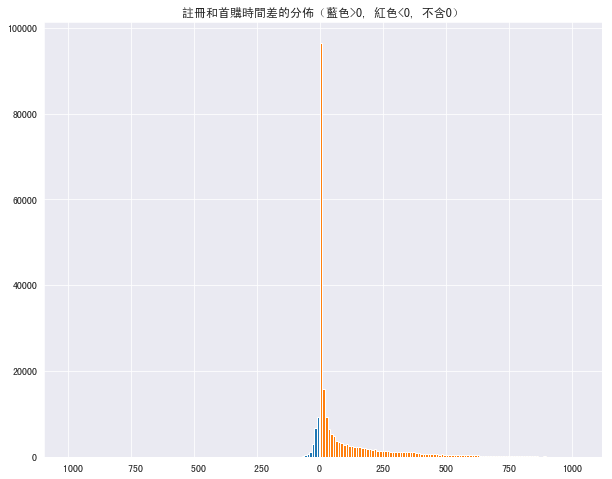

In [19]:
df_members[df_members['diff'] <0]['diff'].hist(bins=100, figsize=(10,8))
df_members[df_members['diff'] >0]['diff'].hist(bins=100, figsize=(10,8))
plt.title('註冊和首購時間差的分佈（藍色>0, 紅色<0, 不含0）')
print(df_members['diff'].value_counts()) #發現有很多負的，好怪

In [20]:
df_members[df_members['diff'] < 0] 
#蠻多人首購時間在註冊之前，且有開卡禮 
#-->  註冊的定義應該是有註冊帳戶即可，且有下載APP應該能獲得折價卷，但折價卷的id是？ 而且有些人首購時沒註冊，還能有開卡禮誒?? 
#不過也可能是後來填資料才獲得開卡禮的，首購時還沒有開卡禮

,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList,get_OpenCardPresent,get_LastBirthdayPresentYear,MinOrder,status,diff
9189,527959,NaN,NaN,NaN,2015-07-14,2015-07-11,0,0,NaN,False,False,True,無開卡無生日,-3.0
9190,590713,NaN,NaN,NaN,2015-07-28,2015-07-15,0,0,NaN,False,False,True,無開卡無生日,-13.0
9194,1288496,NaN,NaN,NaN,2015-07-28,2015-07-23,0,0,NaN,False,False,True,無開卡無生日,-5.0
9195,1452829,NaN,NaN,NaN,2015-07-28,2015-07-17,0,0,NaN,False,False,True,無開卡無生日,-11.0
9260,1134279,NaN,NaN,Web,2016-06-19,2016-03-14,0,0,NaN,False,False,True,無開卡無生日,-97.0
9265,1382140,NaN,NaN,NaN,2015-07-14,2015-07-01,0,0,NaN,False,False,True,無開卡無生日,-13.0
9726,1483157,1992-01-26,Female,NaN,2015-07-28,2015-07-20,318,2018,NaN,True,True,True,有開卡有生日,-8.0
9727,528810,NaN,NaN,NaN,2015-07-14,2015-07-12,0,0,NaN,False,False,True,無開卡無生日,-2.0
9732,1369355,1986-04-12,Female,NaN,2015-07-14,2015-06-28,7282,2018,NaN,True,True,True,有開卡有生日,-16.0
9992,1433306,1984-05-05,Female,NaN,2015-07-14,2015-07-11,7693,2018,NaN,True,True,True,有開卡有生日,-3.0


In [21]:
df_members[df_members['diff'] < 0].describe()

,MemberId,OpenCardPresent,LastBirthdayPresentYear,diff
count,2.229000e+04,22290.000000,22290.000000,22290.000000
mean,1.095446e+06,518.135666,501.228802,-23.976267
std,4.646010e+05,1707.352489,871.771435,62.182225
min,1.372000e+03,0.000000,0.000000,-992.000000
25%,7.715462e+05,0.000000,0.000000,-22.000000
50%,1.310808e+06,0.000000,0.000000,-13.000000
75%,1.415482e+06,173.000000,0.000000,-6.000000
max,6.374955e+06,11428.000000,2018.000000,-1.000000


In [22]:
#以memberId=699740此人而言，他首購日期2015-7-19，註冊日期較晚為2015-7-28，但有開卡禮
print(df_members[df_members['diff'] < 0].loc[df_members['MemberId'] == 699740])
#看他的交易紀錄，2015-7-19那筆用的是編號4315的Econpon，而不是開卡禮編號7693的。
##但從Econpon dataset查不到這兩種優惠碼....但有一個叫「first downlad」的優惠碼類別...
df = df_orders.loc[df_orders['MemberId'] == 699740]
df[['PromotionDiscount','ECouponId', 'ECouponDiscount','SalesOrderSlaveTotalPayment','SalesOrderSlaveDateTime']]

       MemberId    Birthday GenderTypeDef RegisterSourceTypeDef  \
10256    699740  1995-05-18        Female                   NaN   

      RegisterDateTime MinOrderDate  OpenCardPresent  LastBirthdayPresentYear  \
10256       2015-07-28   2015-07-19             7693                     2018   

      IsInBlackList  get_OpenCardPresent  get_LastBirthdayPresentYear  \
10256           NaN                 True                         True   

       MinOrder  status  diff  
10256      True  有開卡有生日  -9.0  


,PromotionDiscount,ECouponId,ECouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime
540527,0.0,4315,-50.0,123.0,2015-07-19 12:17:05.850
578127,0.0,0,0.0,395.0,2017-05-03 09:45:43.327
578128,0.0,0,0.0,199.0,2017-05-03 09:45:43.340
578129,0.0,0,0.0,99.0,2017-05-03 09:45:43.357
4981363,-74.0,0,0.0,225.0,2016-12-09 13:25:34.097
4981364,-83.0,0,0.0,316.0,2016-12-09 13:25:34.113
4981365,-79.0,0,0.0,316.0,2016-12-09 13:25:34.130
4981366,-71.0,0,0.0,279.0,2016-12-09 13:25:34.160
4981367,-91.0,0,0.0,359.0,2016-12-09 13:25:34.193


### Econpon 

In [23]:
df_ECoupon.head()

,ECouponId,ECouponTypeDef,ECouponStartDateTime,ECouponEndDateTime,ECouponUsingStartDateTime,ECouponUsingEndDateTime,ECouponDiscountPrice,ECouponMaxDiscountLimit
0,3046,DrawOut,2015-05-16 00:00:00,2015-05-17 23:59:00,2015-05-16 00:00:00,2015-05-17 23:59:00,50.0,0.3
1,3086,OpenCard,2015-05-20 15:00:00,2015-06-03 23:59:00,2015-05-20 15:00:00,2015-06-03 23:59:00,50.0,0.3
2,3111,DrawOut,2015-05-23 00:00:00,2015-05-24 23:59:00,2015-05-23 00:00:00,2015-05-24 23:59:00,50.0,0.3
3,3225,DrawOut,2015-05-30 00:00:00,2015-05-31 23:59:00,2015-05-30 00:00:00,2015-05-31 23:59:00,50.0,0.3
4,3280,OpenCard,2015-06-04 00:00:00,2015-06-17 00:00:00,2015-06-04 00:00:00,2015-06-17 00:00:00,50.0,0.3


In [24]:
df_ECoupon.describe(include='all')

,ECouponId,ECouponTypeDef,ECouponStartDateTime,ECouponEndDateTime,ECouponUsingStartDateTime,ECouponUsingEndDateTime,ECouponDiscountPrice,ECouponMaxDiscountLimit
count,261.000000,261,261,261,261,261,261.000000,261.000000
unique,NaN,5,160,153,146,134,NaN,NaN
top,NaN,Code,2017-08-01 00:00:00,2017-10-31 23:59:00,2017-08-01 00:00:00,2017-10-31 23:59:00,NaN,NaN
freq,NaN,112,10,18,11,19,NaN,NaN
mean,32141.704981,NaN,NaN,NaN,NaN,NaN,104.758621,0.279693
std,22036.969755,NaN,NaN,NaN,NaN,NaN,50.261921,0.078013
min,3046.000000,NaN,NaN,NaN,NaN,NaN,10.000000,0.100000
25%,10086.000000,NaN,NaN,NaN,NaN,NaN,88.000000,0.300000
50%,34938.000000,NaN,NaN,NaN,NaN,NaN,100.000000,0.300000
75%,51394.000000,NaN,NaN,NaN,NaN,NaN,100.000000,0.300000


In [25]:
#convery col to datetime dtype
for col in ['ECouponStartDateTime','ECouponEndDateTime', 'ECouponUsingStartDateTime','ECouponUsingEndDateTime']:
    df_ECoupon[col] = pd.to_datetime(df_ECoupon[col])
    
#compute date diff
df_ECoupon['ECoupon_diff'] = df_ECoupon['ECouponEndDateTime'] - df_ECoupon['ECouponStartDateTime'] 
df_ECoupon['ECouponUsing_diff'] = df_ECoupon['ECouponUsingEndDateTime'] - df_ECoupon['ECouponUsingStartDateTime'] 

#convert timedelta to integer
df_ECoupon['ECoupon_diff'] = df_ECoupon['ECoupon_diff'].apply(lambda x: x.days)
df_ECoupon['ECouponUsing_diff'] = df_ECoupon['ECouponUsing_diff'].apply(lambda x: x.days)

In [26]:
df_ECoupon.head()

,ECouponId,ECouponTypeDef,ECouponStartDateTime,ECouponEndDateTime,ECouponUsingStartDateTime,ECouponUsingEndDateTime,ECouponDiscountPrice,ECouponMaxDiscountLimit,ECoupon_diff,ECouponUsing_diff
0,3046,DrawOut,2015-05-16 00:00:00,2015-05-17 23:59:00,2015-05-16 00:00:00,2015-05-17 23:59:00,50.0,0.3,1,1
1,3086,OpenCard,2015-05-20 15:00:00,2015-06-03 23:59:00,2015-05-20 15:00:00,2015-06-03 23:59:00,50.0,0.3,14,14
2,3111,DrawOut,2015-05-23 00:00:00,2015-05-24 23:59:00,2015-05-23 00:00:00,2015-05-24 23:59:00,50.0,0.3,1,1
3,3225,DrawOut,2015-05-30 00:00:00,2015-05-31 23:59:00,2015-05-30 00:00:00,2015-05-31 23:59:00,50.0,0.3,1,1
4,3280,OpenCard,2015-06-04 00:00:00,2015-06-17 00:00:00,2015-06-04 00:00:00,2015-06-17 00:00:00,50.0,0.3,13,13


In [27]:
#折價卷發行起始日和使用起始日是否重疊？
overlap = (df_ECoupon['ECouponStartDateTime'] == df_ECoupon['ECouponUsingStartDateTime']) | (df_ECoupon['ECoupon_diff'] == df_ECoupon['ECouponUsing_diff'])
overlap.value_counts()
#發現幾乎一模一樣

True     246
False     15
dtype: int64

0     227
29     11
28      9
1       6
92      3
90      2
91      1
89      1
26      1
Name: diff_diff, dtype: int64


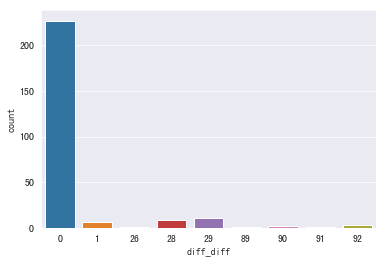

In [28]:
#計算同個coupon 發行時限 和 使用期限 的時間差
df_ECoupon['diff_diff'] = df_ECoupon['ECouponUsing_diff'] - df_ECoupon['ECoupon_diff']
print(df_ECoupon['diff_diff'].value_counts())
sns.countplot(df_ECoupon['diff_diff'])
#兩者高度重疊！

In [29]:
#細部去看，不重疊的部分，多是生日禮類型 --> 合理，自生日隔月的一個月使用期限
df_ECoupon[(df_ECoupon['ECouponStartDateTime'] != df_ECoupon['ECouponUsingStartDateTime']) | (df_ECoupon['ECoupon_diff'] != df_ECoupon['ECouponUsing_diff'])]
#且發現，生日禮固定在每月25號發，並可隔月使用（期限也只有一個月）
#另種(code)，發行期間幾乎都是30天，使用期間4個月 （只有一個例外, id=50388）

,ECouponId,ECouponTypeDef,ECouponStartDateTime,ECouponEndDateTime,ECouponUsingStartDateTime,ECouponUsingEndDateTime,ECouponDiscountPrice,ECouponMaxDiscountLimit,ECoupon_diff,ECouponUsing_diff,diff_diff
91,13522,Birthday,2016-05-25 00:00:00,2016-05-26 00:00:00,2016-06-01 00:00:00,2016-06-30 23:59:00,100.0,0.3,1,29,28
95,14704,Birthday,2016-06-25 00:00:00,2016-06-26 00:00:00,2016-07-01 00:00:00,2016-07-31 23:59:00,100.0,0.3,1,30,29
99,15918,Birthday,2016-07-25 00:00:00,2016-07-26 00:00:00,2016-08-01 00:00:00,2016-08-31 23:59:00,100.0,0.3,1,30,29
104,17600,Birthday,2016-08-25 00:00:00,2016-08-26 00:00:00,2016-09-01 00:00:00,2016-09-30 23:59:00,100.0,0.3,1,29,28
108,19725,Birthday,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-11-01 00:00:00,2016-11-30 23:59:00,100.0,0.3,1,29,28
113,25201,Birthday,2016-12-25 00:00:00,2016-12-26 00:00:00,2017-01-01 00:00:00,2017-01-31 23:59:00,100.0,0.3,1,30,29
121,30169,Birthday,2017-02-25 00:00:00,2017-02-26 00:00:00,2017-03-01 00:00:00,2017-03-31 23:59:00,100.0,0.3,1,30,29
126,32285,Birthday,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-04-01 00:00:00,2017-04-30 23:59:00,100.0,0.3,1,29,28
131,34941,Birthday,2017-05-25 00:00:00,2017-05-26 00:00:00,2017-06-01 00:00:00,2017-06-30 23:59:00,100.0,0.3,1,29,28
132,34942,Birthday,2017-06-25 00:00:00,2017-06-26 00:00:00,2017-07-01 00:00:00,2017-07-31 23:59:00,100.0,0.3,1,30,29


Code             112
DrawOut           82
OpenCard          38
Birthday          21
FirstDownload      8
Name: ECouponTypeDef, dtype: int64


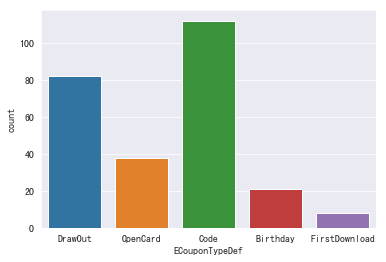

In [30]:
#Drawout:一般領取型, Code:輸入券號, Birthday:生日禮, OpenCard:開卡禮, FirstDownload:
print(df_ECoupon['ECouponTypeDef'].value_counts())
sns.countplot(data=df_ECoupon, x = 'ECouponTypeDef')
#最多的是輸入券號, 其次是一般領取型

ECouponTypeDef  ECouponDiscountPrice
Birthday        100.0                   21
Code            100.0                   49
                150.0                   21
                200.0                   12
                50.0                    10
                120.0                    7
                300.0                    5
                10.0                     1
                66.0                     1
                70.0                     1
                77.0                     1
                88.0                     1
                168.0                    1
                188.0                    1
                373.0                    1
DrawOut         100.0                   57
                50.0                    19
                66.0                     2
                150.0                    2
                30.0                     1
                200.0                    1
FirstDownload   100.0                    8
OpenCard        5

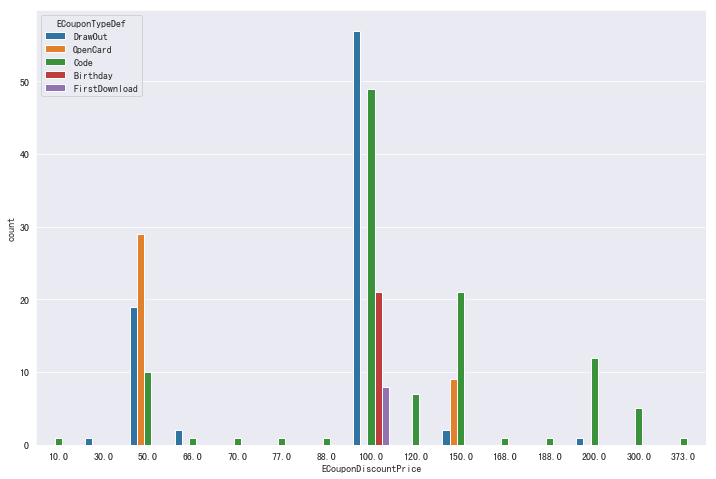

In [31]:
#類別 和 折扣金額 的關係
print(df_ECoupon.groupby('ECouponTypeDef')['ECouponDiscountPrice'].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(data=df_ECoupon, hue = 'ECouponTypeDef', x = 'ECouponDiscountPrice' )
#Birthday: 只有100元 (Q:生日禮ppt寫1200...
#FirstDownload: 只有100元 (Q:那就不會是下載aPP啦？因為ppt上面寫下載aPP是200元、填資料100元...)
#opencard: 50 & 150.....(Q: ppt上面寫填資料100元...

In [32]:
df_ECoupon[df_ECoupon['ECouponTypeDef'] == 'OpenCard'] 

,ECouponId,ECouponTypeDef,ECouponStartDateTime,ECouponEndDateTime,ECouponUsingStartDateTime,ECouponUsingEndDateTime,ECouponDiscountPrice,ECouponMaxDiscountLimit,ECoupon_diff,ECouponUsing_diff,diff_diff
1,3086,OpenCard,2015-05-20 15:00:00,2015-06-03 23:59:00,2015-05-20 15:00:00,2015-06-03 23:59:00,50.0,0.3,14,14,0
4,3280,OpenCard,2015-06-04 00:00:00,2015-06-17 00:00:00,2015-06-04 00:00:00,2015-06-17 00:00:00,50.0,0.3,13,13,0
7,3613,OpenCard,2015-06-19 12:00:00,2015-06-30 23:59:00,2015-06-19 12:00:00,2015-06-30 23:59:00,50.0,0.3,11,11,0
11,3916,OpenCard,2015-07-01 18:00:00,2015-07-31 23:59:00,2015-07-01 18:00:00,2015-07-31 23:59:00,50.0,0.3,30,30,0
17,4737,OpenCard,2015-08-04 12:00:00,2015-08-31 23:59:00,2015-08-04 12:00:00,2015-08-31 23:59:00,50.0,0.3,27,27,0
28,5441,OpenCard,2015-09-01 00:00:00,2015-10-01 23:59:00,2015-09-01 00:00:00,2015-10-01 23:59:00,50.0,0.3,30,30,0
36,6328,OpenCard,2015-10-02 00:00:00,2015-10-31 23:59:00,2015-10-02 00:00:00,2015-10-31 23:59:00,50.0,0.3,29,29,0
41,7287,OpenCard,2015-11-01 00:00:00,2015-11-30 23:59:00,2015-11-01 00:00:00,2015-11-30 23:59:00,50.0,0.3,29,29,0
51,8037,OpenCard,2015-12-01 00:00:00,2015-12-31 23:59:00,2015-12-01 00:00:00,2015-12-31 23:59:00,50.0,0.3,30,30,0
55,9029,OpenCard,2016-01-01 00:00:00,2016-01-31 23:59:00,2016-01-01 00:00:00,2016-01-31 23:59:00,50.0,0.3,30,30,0


ECouponTypeDef  ECouponUsing_diff
Birthday        30                   11
                29                    9
                27                    1
Code            61                   10
                91                    9
                2                     8
                4                     8
                46                    8
                6                     7
                1                     5
                3                     5
                14                    5
                75                    5
                7                     4
                8                     4
                9                     4
                55                    4
                59                    4
                65                    4
                52                    3
                5                     2
                119                   2
                121                   2
                27                    1
      

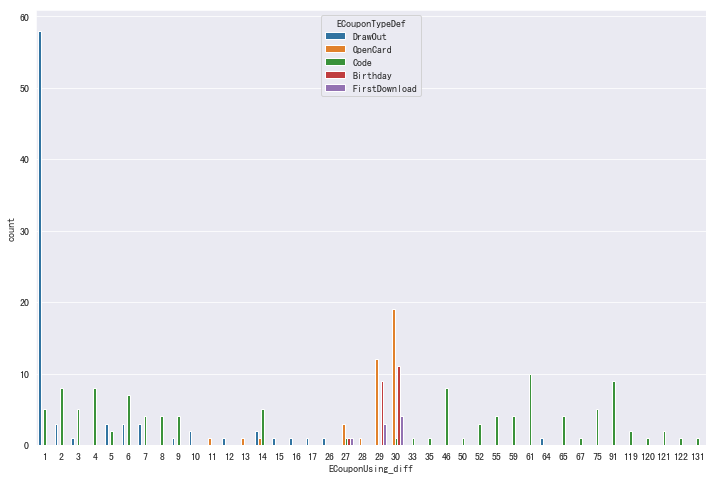

In [33]:
#類別 和 使用期限 的關係
print(df_ECoupon.groupby('ECouponTypeDef')['ECouponUsing_diff'].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(data=df_ECoupon, hue = 'ECouponTypeDef', x = 'ECouponUsing_diff' )
#一般領取(drawout) 幾乎只能用一天 why??
#Opencard: 約一個月
#Birthday: 一個月
#FirstDownload:  一個月
#code: 分佈廣

### Orders

In [63]:
df_orders.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [64]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [65]:
df_orders.isnull().sum()

DateId                               0
MemberId                             0
OrderGroupCode                       0
TrackSourceTypeDef                   0
TrackDeviceTypeDef                   0
PayProfileTypeDef                    0
SalesOrderSlaveId                    0
SalePageId                           0
IsMajor                              0
IsGift                               0
IsSalePageGift                       0
Quantity                             0
UnitPrice                            0
PromotionDiscount                    0
ECouponId                            0
ECouponDiscount                      0
SalesOrderSlaveTotalPayment          0
SalesOrderSlaveDateTime              0
SalesOrderReceiverId                 0
City                                 9
District                       1327019
ZipCode                              9
StoreName                       498270
StoreId                         498270
DeliverTypeDef                       0
StatusDef                

In [66]:
df_orders['MemberId'].nunique() #還沒merge之前的資料數 #和member dataset中有首購的人數差不多 #有不是會員的人在裡面嗎？

563457

In [67]:
#把有沒有生日禮和開卡禮的狀態，加入到df_orders
df_orders = pd.merge(df_orders, df_members[['MemberId', 'status']], on = 'MemberId', how = 'outer')

In [70]:
df_orders['status'].notnull().value_counts() #merge之後orders多了未購物者的資料
#只留下有購物者的資料
df_orders.dropna(subset=['DateId'], inplace=True) #恢復成原來的5495276筆資料

In [71]:
df_orders['status'].notnull().value_counts() #有5065筆資料不是會員（？）
df_orders['status'].fillna('沒資料', inplace=True) #把沒資料的補上「沒資料」

In [102]:
#DateId轉換成datetime
df_orders['DateId'] = pd.to_datetime(df_orders['SalesOrderSlaveDateTime'])
df_orders['DateId'] = df_orders['DateId'].dt.date

In [114]:
#購買時間拆成weekday和hour of day
df_orders['SalesOrderSlaveDateTime'] = pd.to_datetime(df_orders['SalesOrderSlaveDateTime'])
df_orders['hour'] = df_orders['SalesOrderSlaveDateTime'].dt.hour
df_orders['weekday'] = df_orders['SalesOrderSlaveDateTime'].dt.weekday

In [165]:
#columns分類
#是否為贈品不放入，因為比例只有1/50
pq_list = ['Quantity','UnitPrice','PromotionDiscount','ECouponDiscount', 'SalesOrderSlaveTotalPayment']
column_list = ['DateId','MemberId','OrderGroupCode','TrackSourceTypeDef','TrackDeviceTypeDef','PayProfileTypeDef','City','DeliverTypeDef','StatusDef','status', 'weekday', 'hour' ]


In [302]:
#以購物車（發票）為單位
#取「主件」且「有成功交易」
df_Cart = df_orders[(df_orders['IsGift'] == False) & (df_orders['IsMajor'] == True) & (df_orders['StatusDef'] == 'Finish')].groupby(column_list, as_index=False)[pq_list].sum()

In [304]:
df_Cart.groupby('MemberId')['Quantity'].sum().describe()

count    491833.000000
mean          8.479476
std          11.563443
min           1.000000
25%           3.000000
50%           5.000000
75%          10.000000
max         546.000000
Name: Quantity, dtype: float64

In [305]:
df_Cart.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,City,DeliverTypeDef,StatusDef,status,weekday,hour,Quantity,UnitPrice,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment
0,2015-05-06,192540,"b""\xcbd\x1c\x06\x9d\xd1\x19\xfc_'`\x8b\xaf\xcf...",AndroidApp,Mobile,Family,彰化縣,Family,Finish,無開卡無生日,2,22,6.0,1357.0,0.0,0.0,1357.0
1,2015-05-06,205786,b'\xcc\xb55c\xf2k\xd3U\xce\xf6\xec:\xf7\x90\xe...,iOSApp,Mobile,Family,新北市,Family,Finish,無開卡無生日,2,20,5.0,1033.0,0.0,0.0,1033.0
2,2015-05-06,297791,b'\xcb\xea\xe3{\xec\xea{>\x86]\xa4A:c\xeem\x93...,AndroidApp,Mobile,Family,新北市,Family,Finish,無開卡無生日,2,20,1.0,299.0,0.0,0.0,299.0
3,2015-05-06,403195,b'\x8dM\x91\xa9\xbd^#\xbe2U\x12\xdd\x8f\x8e\xf...,iOSApp,Mobile,SevenEleven,新北市,SevenEleven,Finish,無開卡無生日,2,23,1.0,299.0,0.0,0.0,299.0
4,2015-05-06,808449,b'M\xbb\x18\x18\xa5\xcf.\x97\xd7\x99\xadKM\x17...,AndroidApp,Mobile,SevenEleven,苗栗縣,SevenEleven,Finish,無開卡無生日,2,22,6.0,1194.0,0.0,0.0,1194.0


In [307]:
df_orders

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,IsSalePageGift,Quantity,UnitPrice,PromotionDiscount,ECouponId,ECouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,status,Hour,hour,weekday
0,2015-07-03,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777.0,1242871.0,True,False,False,1.0,350.0,0.0,0.0,0.0,350.0,2015-07-03 07:30:02.007,1480890.0,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
1,2015-07-03,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778.0,1242880.0,True,False,False,1.0,199.0,0.0,0.0,0.0,199.0,2015-07-03 07:30:02.023,1480890.0,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
2,2015-07-03,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779.0,1242880.0,True,False,False,1.0,199.0,0.0,0.0,0.0,199.0,2015-07-03 07:30:02.040,1480890.0,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
3,2015-07-03,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780.0,1175574.0,True,False,False,1.0,225.0,0.0,0.0,0.0,225.0,2015-07-03 07:30:02.057,1480890.0,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
4,2015-07-03,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791.0,1194488.0,True,False,False,1.0,100.0,0.0,0.0,0.0,100.0,2015-07-03 07:33:01.600,1480896.0,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
5,2015-07-03,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457792.0,1256479.0,True,False,False,1.0,188.0,0.0,0.0,0.0,188.0,2015-07-03 07:33:01.600,1480896.0,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
6,2015-07-03,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457793.0,1256508.0,True,False,False,1.0,199.0,0.0,0.0,0.0,199.0,2015-07-03 07:33:01.617,1480896.0,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
7,2015-07-03,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457794.0,1256548.0,True,False,False,1.0,99.0,0.0,0.0,0.0,99.0,2015-07-03 07:33:01.633,1480896.0,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,無開卡無生日,7,7,4
8,2015-06-26,365787,b'\xc3N\xa6\xff\xc3a\xba9\xb5\xab07\xa5\xf92g\...,Web,Mobile,SevenEleven,4339748.0,1162471.0,True,False,False,1.0,149.0,0.0,0.0,0.0,149.0,2015-06-26 23:32:00.560,1443646.0,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,無開卡無生日,23,23,4
9,2015-06-26,365787,b'\xc3N\xa6\xff\xc3a\xba9\xb5\xab07\xa5\xf92g\...,Web,Mobile,SevenEleven,4339749.0,1224313.0,True,False,False,1.0,90.0,0.0,0.0,0.0,90.0,2015-06-26 23:32:00.577,1443646.0,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,無開卡無生日,23,23,4


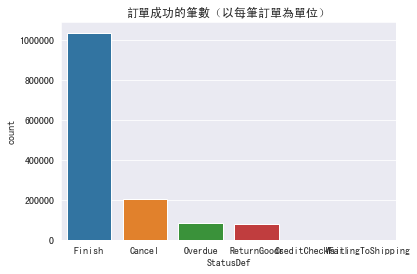

"\nplt.figure(figsize=(8,5))\nsns.countplot(data = df_Cart, x = 'StatusDef', hue = 'status')\nplt.title('訂單成功的筆數') #大部分成功，少部分取消\nplt.show()"

In [179]:
sns.countplot(data = df_Cart, x = 'StatusDef')
plt.title('訂單成功的筆數（以每筆訂單為單位）') #大部分成功，少部分取消
plt.show()
'''
plt.figure(figsize=(8,5))
sns.countplot(data = df_Cart, x = 'StatusDef', hue = 'status')
plt.title('訂單成功的筆數') #大部分成功，少部分取消
plt.show()'''

#後面可以去看，交易不成功的是否就不會再購了？？（ie和交易次數的相關性？）

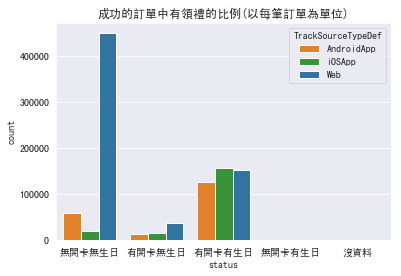

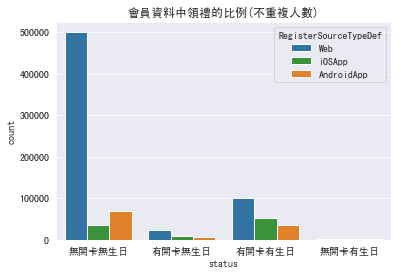

In [180]:
palette ={"Web":"C0","AndroidApp":"C1","iOSApp":"C2"}
sns.countplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'], x = 'status', hue ='TrackSourceTypeDef',  order = ['無開卡無生日', '有開卡無生日','有開卡有生日','無開卡有生日','沒資料'],palette = palette) 
plt.title('成功的訂單中有領禮的比例(以每筆訂單為單位)')
plt.show()
#沒開卡沒生日：購物次數超多（幾乎全是會員）！且大多用web消費
#有開卡：最多用ios消費，且三種來源的比例沒差太多

sns.countplot(data = df_members, x = 'status', hue ='RegisterSourceTypeDef', order = ['無開卡無生日', '有開卡無生日','有開卡有生日','無開卡有生日'],palette = palette) 
plt.title('會員資料中領禮的比例(不重複人數)')
plt.show()

In [43]:
df_members['RegisterSourceTypeDef'].isnull().value_counts() #但member資料中，有30000筆資料不知道註冊來源

False    829143
True      30003
Name: RegisterSourceTypeDef, dtype: int64

In [44]:
print(df_orders['TrackSourceTypeDef'].isnull().value_counts()) #orders的都有
print(df_orders['TrackDeviceTypeDef'].isnull().value_counts())

False    5495276
Name: TrackSourceTypeDef, dtype: int64
False    5495276
Name: TrackDeviceTypeDef, dtype: int64


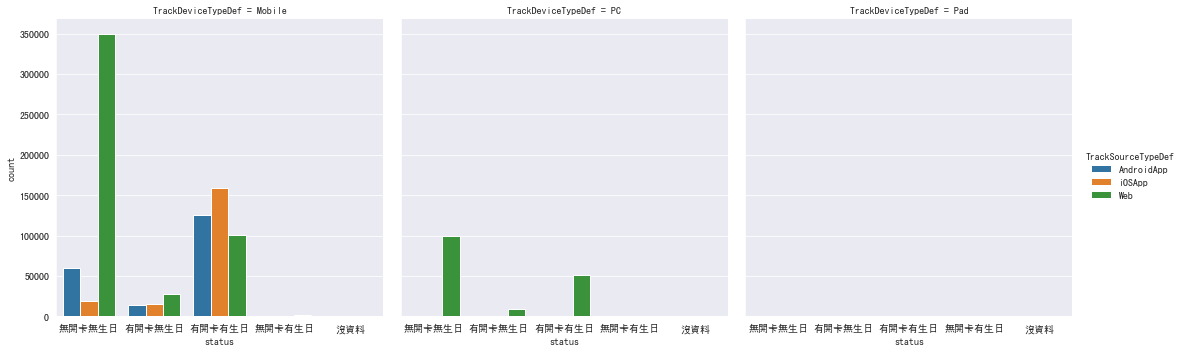

In [181]:
#成功交易的訂單中領禮的比例(以每筆訂單計)
sns.catplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'], x = 'status', col ='TrackDeviceTypeDef', hue = 'TrackSourceTypeDef', kind='count',order = ['無開卡無生日', '有開卡無生日','有開卡有生日','無開卡有生日','沒資料']) 
plt.show()

#大多用mobile
#無開卡無生日的：非常高比例用mobile，用PC的只有約1/3
#有開卡有生日禮的，用web的最少，用app的是用web的三倍！

In [182]:
df_Cart['TrackDeviceTypeDef'].value_counts() #用pad的人很少，可忽略 #用PC的都用web

Mobile    1190938
PC         215200
Pad            78
Name: TrackDeviceTypeDef, dtype: int64

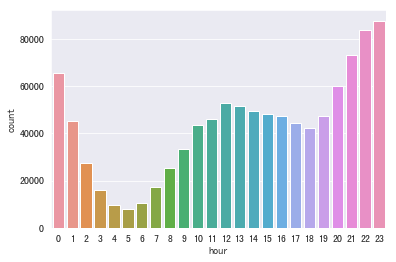

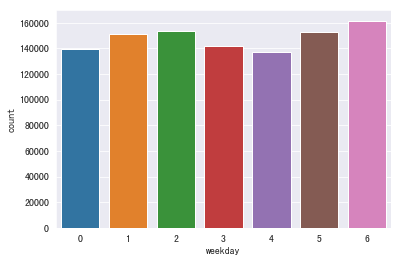

In [229]:
#購物的時間點
sns.countplot(data=df_Cart[df_Cart['StatusDef'] == 'Finish'], x='hour')
plt.show()

#sns.countplot(data=df_Cart[df_Cart['StatusDef'] == 'Finish'], x='hour', hue='TrackDeviceTypeDef')
#plt.show()

#sns.countplot(data=df_Cart[df_Cart['StatusDef'] == 'Finish'], x='hour', hue='TrackSourceTypeDef')
#plt.show()

sns.countplot(data=df_Cart[df_Cart['StatusDef'] == 'Finish'], x='weekday')
plt.show()

#sns.countplot(data=df_Cart[df_Cart['StatusDef'] == 'Finish'], x='weekday',hue='TrackDeviceTypeDef') #0=星期一, 6=星期日
#plt.show()

#sns.countplot(data=df_Cart[df_Cart['StatusDef'] == 'Finish'], x='weekday',hue='TrackSourceTypeDef') #0=星期一, 6=星期日
#plt.show()

In [218]:
#價格和數字轉成integer
df_Cart['Quantity'] = df_Cart['Quantity'].apply(lambda x: int(x))
df_Cart['UnitPrice'] = df_Cart['UnitPrice'].apply(lambda x: int(x))
df_Cart['PromotionDiscount'] = df_Cart['PromotionDiscount'].apply(lambda x: int(x))
df_Cart['ECouponDiscount'] = df_Cart['ECouponDiscount'].apply(lambda x: int(x))
df_Cart['SalesOrderSlaveTotalPayment'] = df_Cart['SalesOrderSlaveTotalPayment'].apply(lambda x: int(x))

In [220]:
df_Cart[pq_list].describe()

,Quantity,UnitPrice,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment
count,1.406216e+06,1.406216e+06,1.406216e+06,1.406216e+06,1.406216e+06
mean,3.988591e+00,1.027921e+03,-9.821231e+01,-2.754164e+01,9.203593e+02
std,2.725998e+00,6.992804e+02,1.685837e+02,4.755977e+01,6.293829e+02
min,1.000000e+00,0.000000e+00,-8.239000e+03,-3.000000e+02,0.000000e+00
25%,2.000000e+00,5.970000e+02,-1.480000e+02,-5.000000e+01,5.590000e+02
50%,3.000000e+00,8.740000e+02,0.000000e+00,0.000000e+00,7.820000e+02
75%,5.000000e+00,1.287000e+03,0.000000e+00,0.000000e+00,1.118000e+03
max,9.200000e+01,2.290700e+04,0.000000e+00,0.000000e+00,1.986600e+04


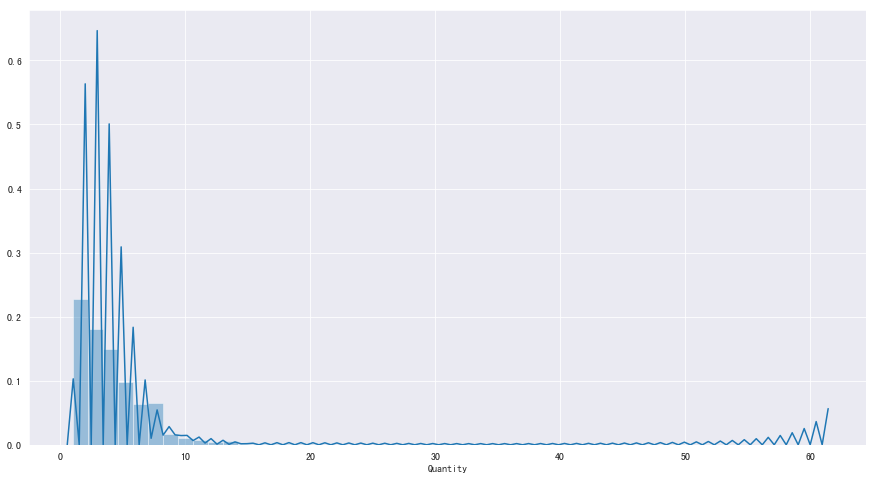

count    1.037679e+06
mean     4.119991e+00
std      2.659606e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      6.100000e+01
Name: Quantity, dtype: float64

In [226]:
#訂單的購買數量分佈
plt.figure(figsize=(15,8))
sns.distplot(df_Cart[df_Cart['StatusDef'] == 'Finish']['Quantity'])
plt.show()

df_Cart[df_Cart['StatusDef'] == 'Finish']['Quantity'].describe()

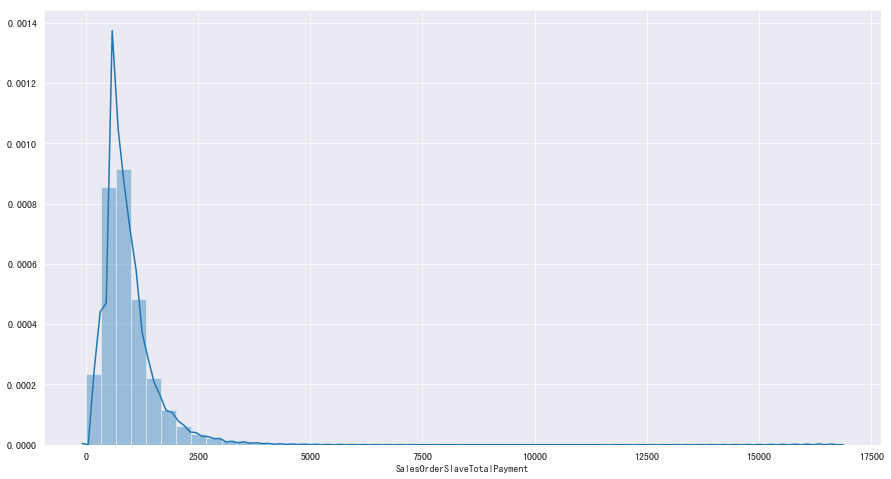

count    1.037679e+06
mean     9.373733e+02
std      6.030480e+02
min      0.000000e+00
25%      5.930000e+02
50%      7.960000e+02
75%      1.135000e+03
max      1.679600e+04
Name: SalesOrderSlaveTotalPayment, dtype: float64

In [228]:
#訂單的購買金額分佈
plt.figure(figsize=(15,8))
sns.distplot(df_Cart[df_Cart['StatusDef'] == 'Finish']['SalesOrderSlaveTotalPayment'])
plt.show()

df_Cart[df_Cart['StatusDef'] == 'Finish']['SalesOrderSlaveTotalPayment'].describe()

In [288]:
df_Cart['DateId'] = df_Cart['DateId'].apply(lambda x: str(x))

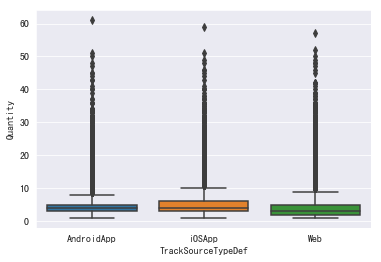

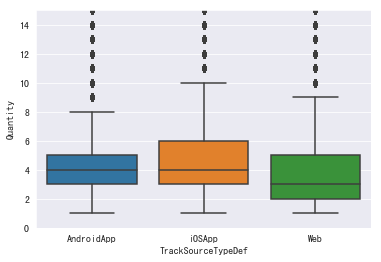

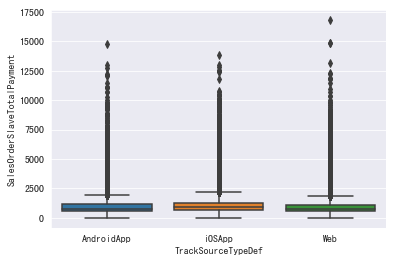

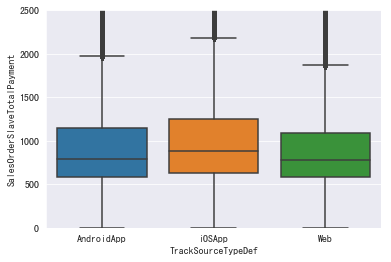

In [268]:
#裝置
sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'TrackSourceTypeDef', y = 'Quantity')
plt.show()

fig, ax = plt.subplots(1, 1)
ax1 = sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'TrackSourceTypeDef', y = 'Quantity')
ax1.set_ylim(0,15)
plt.show()

sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'TrackSourceTypeDef', y = 'SalesOrderSlaveTotalPayment')
plt.show()

fig, ax = plt.subplots(1, 1)
ax2 = sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'TrackSourceTypeDef', y = 'SalesOrderSlaveTotalPayment')
ax2.set_ylim(0,2500)
plt.show()


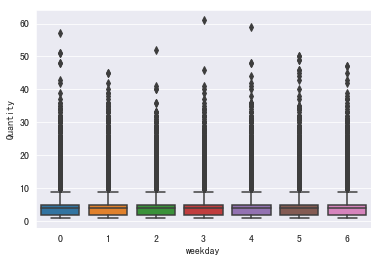

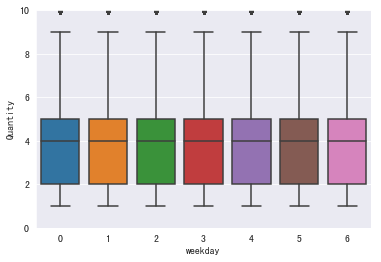

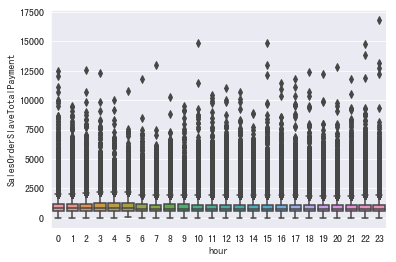

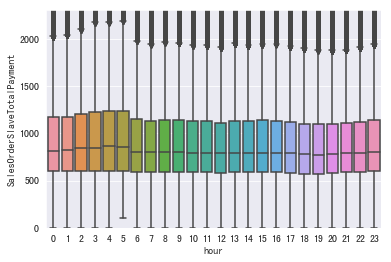

In [267]:
#時間
sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'weekday', y = 'Quantity')
plt.show()

fig, ax = plt.subplots(1, 1)
ax1 = sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'weekday', y = 'Quantity')
ax1.set_ylim(0,10)
plt.show()

sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'hour', y = 'SalesOrderSlaveTotalPayment')
plt.show()

fig, ax = plt.subplots(1, 1)
ax2 = sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'hour', y = 'SalesOrderSlaveTotalPayment')
ax2.set_ylim(0,2300)
plt.show()

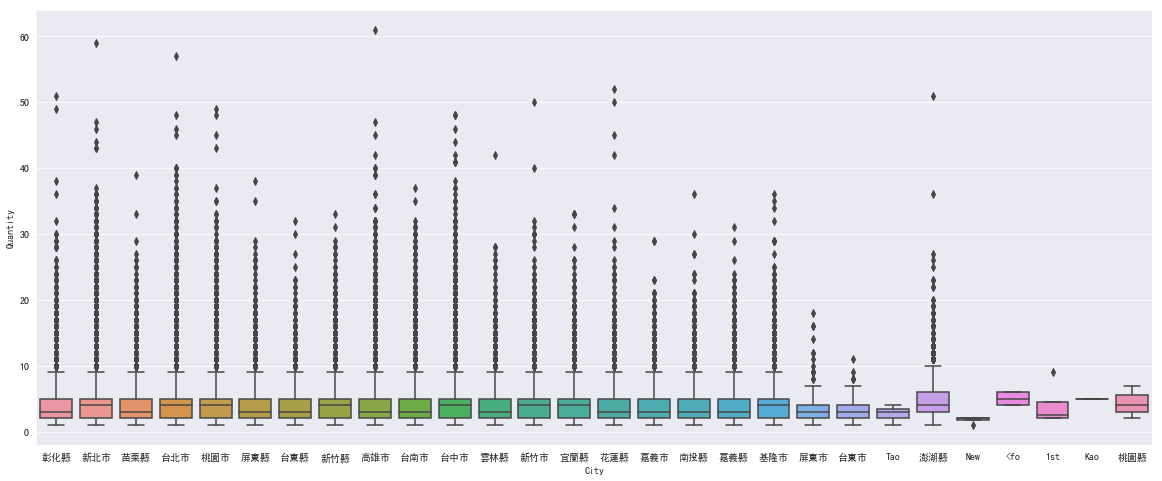

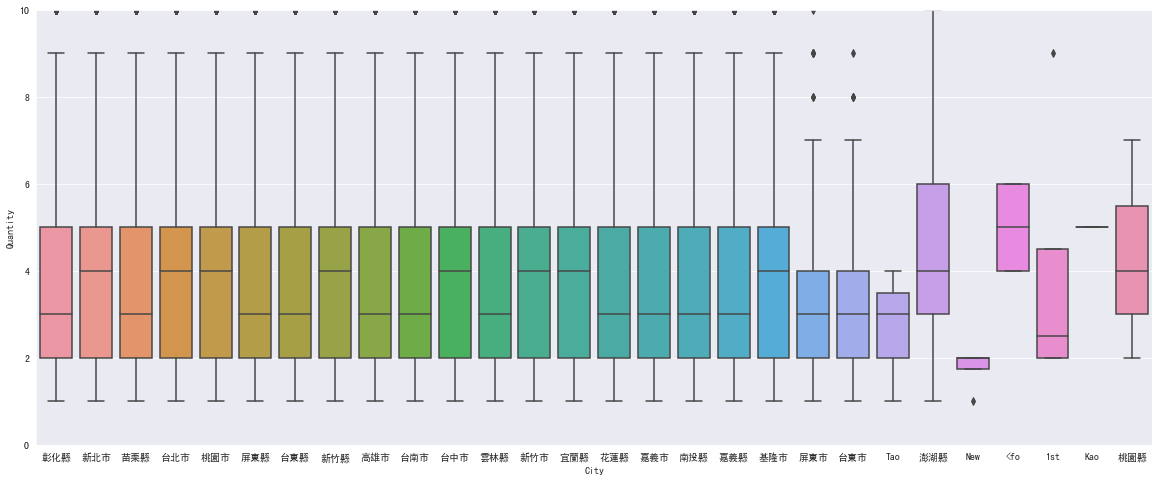

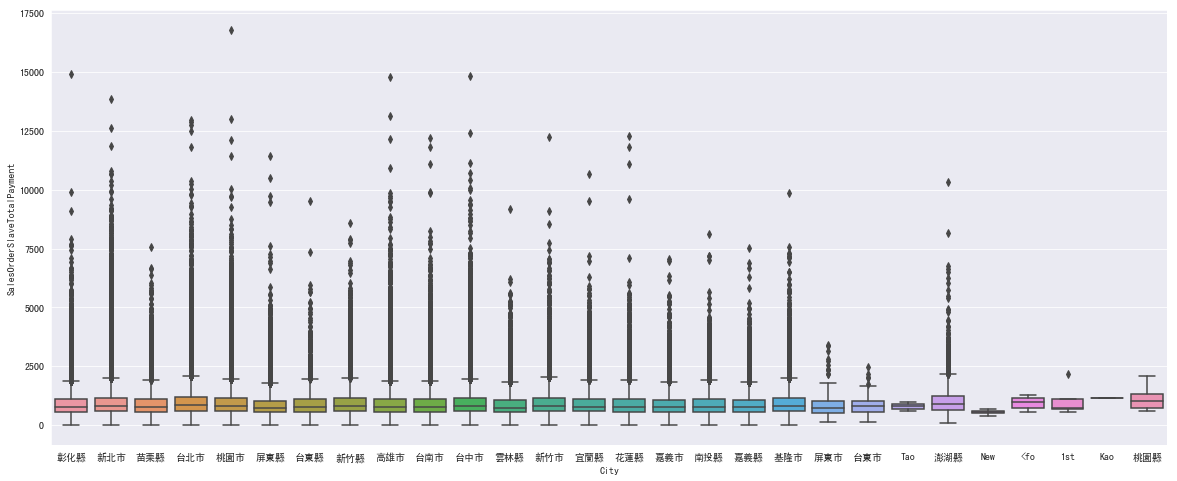

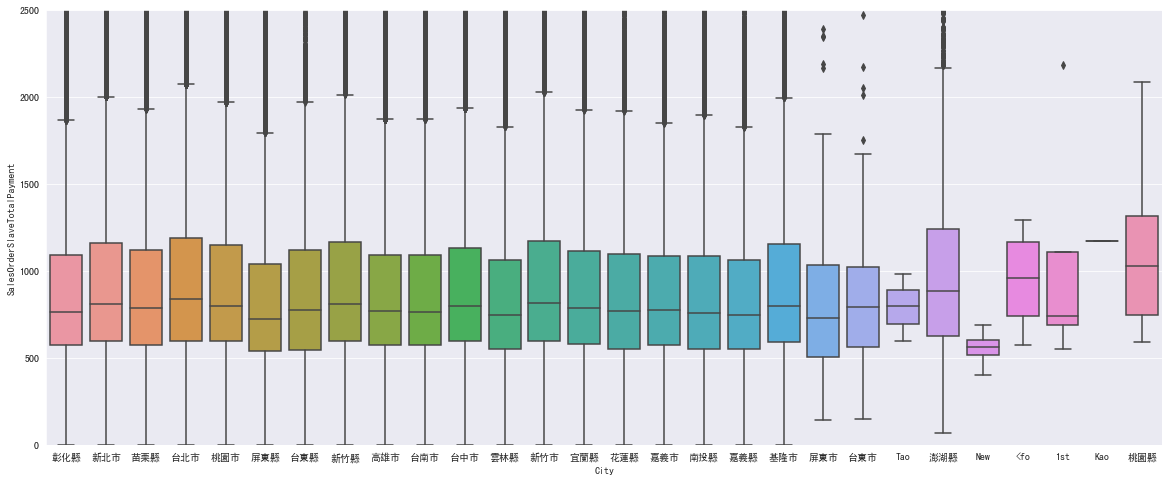

In [282]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'City', y = 'Quantity')
plt.show()

fig, ax = plt.subplots(1, 1,figsize=(20,8))
ax = sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'City', y = 'Quantity')
ax.set_ylim(0,10)
plt.show()

plt.figure(figsize=(20,8))
sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'City', y = 'SalesOrderSlaveTotalPayment')
plt.show()

fig, ax = plt.subplots(1, 1,figsize=(20,8))
ax = sns.boxplot(data = df_Cart[df_Cart['StatusDef'] == 'Finish'] , x = 'City', y = 'SalesOrderSlaveTotalPayment')
ax.set_ylim(0,2500)
plt.show()

In [283]:
df_orders['City'].value_counts()

新北市    1174232
台中市     799081
台北市     693837
桃園市     586934
高雄市     569046
台南市     398810
彰化縣     196922
新竹市     145389
新竹縣     127179
屏東縣     122380
苗栗縣     106055
基隆市      87806
雲林縣      86060
宜蘭縣      85122
南投縣      73099
花蓮縣      67688
嘉義縣      66482
嘉義市      53985
台東縣      34034
澎湖縣      19647
屏東市        764
台東市        418
桃園縣         92
1st         41
<fo         35
New         30
Nan         23
Tao         17
25           8
Tai          8
Quậ          6
Hy           6
Xin          5
Kao          5
Hsi          3
No.          3
Jia          3
Ins          2
Daf          2
Kot          2
Aya          2
Keb          2
Đại          1
Cha          1
Name: City, dtype: int64

In [295]:
df_Cart

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,City,DeliverTypeDef,StatusDef,status,weekday,hour,Quantity,UnitPrice,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment
501271,2016-08-07,3765199,b'+0\x95*\xa5\xb2\xb0\xf8\xa6\xa4Gn\xf0\xc9\xa...,Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,6,14,4,774,0,-100,674
536583,2016-08-30,3765199,b'\xc7q\xc9\xa1\xb3\x1b\xf8\x03\xf2\x97\xe1jL\...,Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,1,13,4,992,0,-66,926
568029,2016-09-18,3765199,b'm!\xf7\x1ft4\x95\xf3Xkq\xd3\xccX\x0fv%ZQ\xed',Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,6,21,4,600,0,0,600
571260,2016-09-20,3765199,b'\xdc\xdc\xa6\xb3\x07\xea\xc3\x89\xb8L3\x1aJ\...,Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,1,9,5,1056,-100,0,956
576307,2016-09-23,3765199,b'\xfd\x7f8\x83\x85&23}\xd0]\xf6t\x8a\xe7\x1d\...,Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,4,12,4,704,0,0,704
615601,2016-10-12,3765199,b'`\xb7\x16:\xb5\x13B\xae5X\xf29P\xdb\xb6\xa0\...,Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,2,8,7,1483,-200,0,1283
639417,2016-10-27,3765199,b'L\x94\x04\xbd\t\xcc\xf0C_\xe2\x8b\xbcqx+H!\x...,Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,3,9,2,548,0,0,548
669194,2016-11-10,3765199,"b""\xba'\xac\xa2\xc1\xbb\xeb\x94N\x96.\x80S\xb9...",Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,3,18,5,1060,-100,0,960
669196,2016-11-10,3765199,b'\x13:E\xfd\x9a\x9d\x05\x08$\xde2LD\x1a\xe3y\...,Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,3,18,5,920,-100,0,820
669198,2016-11-10,3765199,"b'\x8f\xc9Q\xb5\xf1\xc6""\x86\xfb\xb7\x9b\xd1\x...",Web,Mobile,Family,新北市,Family,Finish,有開卡有生日,3,18,5,975,-100,0,875


In [202]:
#計算同個ID的購物次數----因為cancel可能影響結果，所以只取交易成功的訂單
df_nPurchase = df_Cart[df_Cart['StatusDef'] == 'Finish'].groupby(['MemberId','Quantity','SalesOrderSlaveTotalPayment'])['status'].value_counts()

df_nPurchase = df_nPurchase.to_frame()
df_nPurchase = df_nPurchase.rename(columns={df_nPurchase.columns[0]: "num" })

df_nPurchase.reset_index(inplace=True)
df_nPurchase

,MemberId,Quantity,SalesOrderSlaveTotalPayment,status,num
0,1362,4.0,591.0,有開卡有生日,1
1,1384,1.0,590.0,無開卡無生日,1
2,1384,2.0,721.0,無開卡無生日,1
3,1384,3.0,557.0,無開卡無生日,1
4,1391,3.0,593.0,有開卡無生日,1
5,1391,4.0,1214.0,有開卡無生日,1
6,1391,9.0,1747.0,有開卡無生日,1
7,1391,9.0,2056.0,有開卡無生日,1
8,1400,2.0,798.0,無開卡無生日,1
9,1423,3.0,373.0,無開卡無生日,1


In [184]:
df_nPurchase.describe() 

,MemberId,num
count,4.919500e+05,491950.000000
mean,2.382872e+06,2.109318
std,1.565391e+06,2.407090
min,1.362000e+03,1.000000
25%,1.167420e+06,1.000000
50%,2.129540e+06,1.000000
75%,3.445131e+06,2.000000
max,6.771506e+06,125.000000


In [185]:
df_nPurchase[df_nPurchase['num'] >10].describe()

,MemberId,num
count,6.580000e+03,6580.000000
mean,1.819797e+06,15.922188
std,1.202597e+06,7.431341
min,3.945000e+03,11.000000
25%,9.139928e+05,12.000000
50%,1.580766e+06,13.000000
75%,2.607574e+06,17.000000
max,6.372585e+06,125.000000


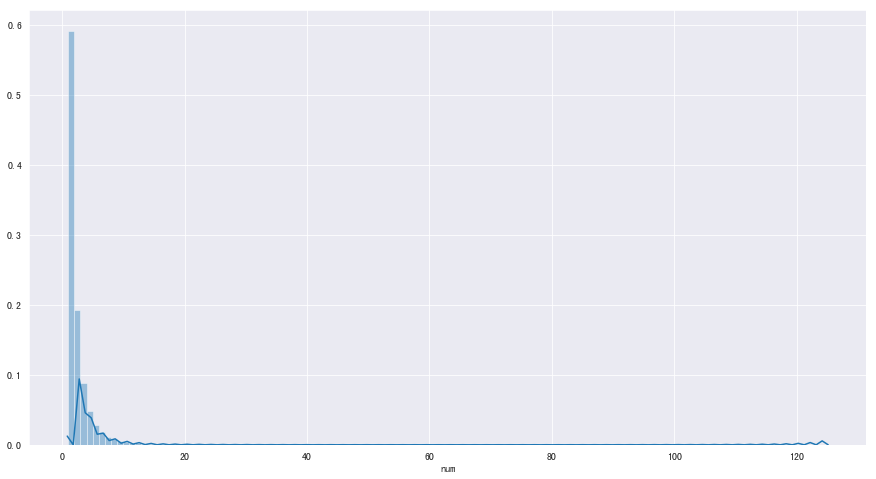

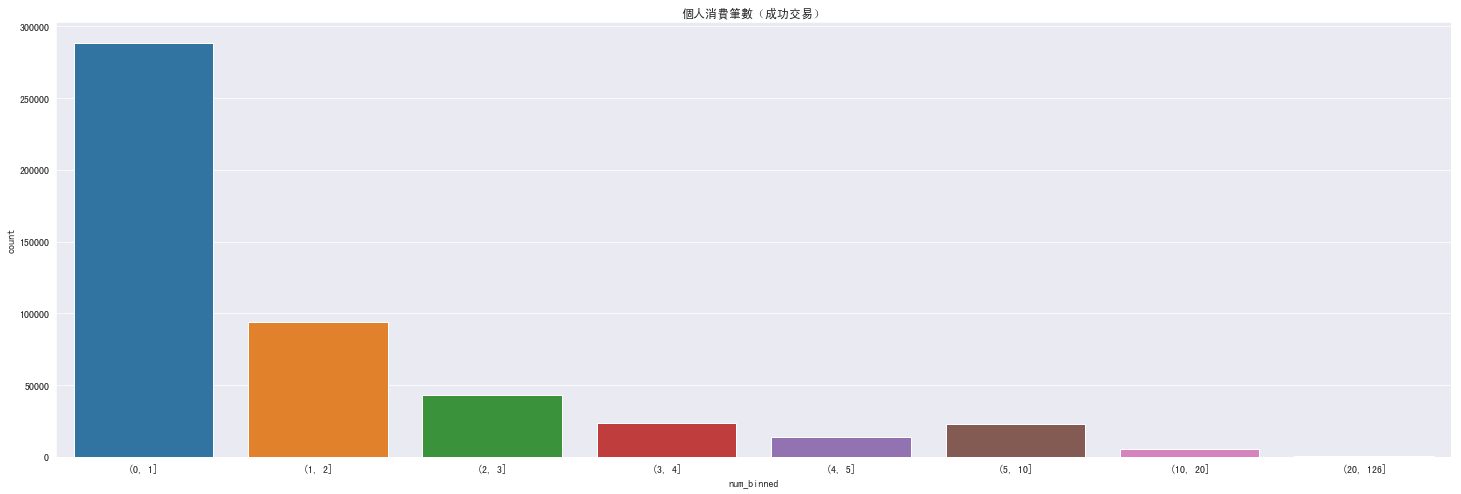

In [196]:
#成功交易中的個人消費次數
plt.figure(figsize=(15,8))
sns.distplot(df_nPurchase['num'], bins=125) #q75-100變異太大，改分類別
plt.show()

#分類後
bin_cut = [0,1,2,3,4,5,10,20,126]
df_nPurchase['num_binned'] = pd.cut(df_nPurchase['num'], bins = bin_cut, right = True) 
plt.figure(figsize=(25,8))
ax = sns.countplot(data = df_nPurchase, x = 'num_binned')
#ax.text(18,40000, 'mean=8.5, std=11.7; q25=3, q50=5, q75=10, q100=544', 
        #horizontalalignment='center', verticalalignment='center',fontsize=30)
#ax.text(8.2,68000, '75%',fontsize=20, color='red')
#plt.axvline(x=9)
#plt.axvline(x=9)
plt.title('個人消費筆數（成功交易）')
plt.show()

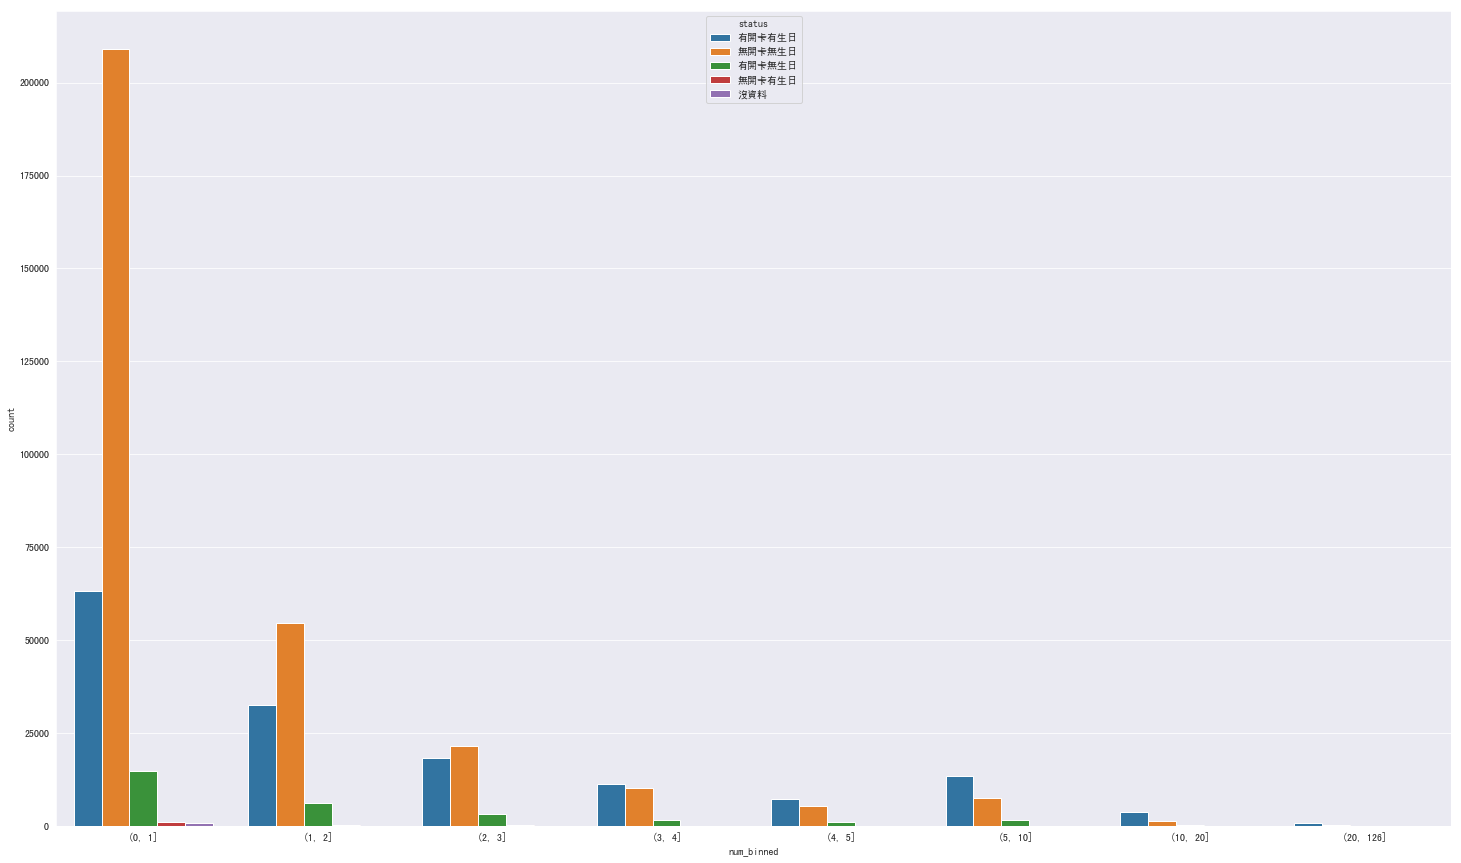

In [197]:
#依有無開卡/生日分類
plt.figure(figsize=(25,15))
ax = sns.countplot(data = df_nPurchase, x='num_binned', hue='status')
#ax.text(10,38000, '整體：mean=8.5, std=11.7; q25=3, q50=5, q75=10, q100=544\n無開卡無生日：mean=6.38,std=7.74; q25=3, q50=4, q75=7, q100=518\n有開卡有生日&有開卡無生日：mean=12.21,std=15.78; q25=4, q50=7, q75=14, q100=544', 
        #horizontalalignment='left', verticalalignment='center',fontsize=20)
plt.show()

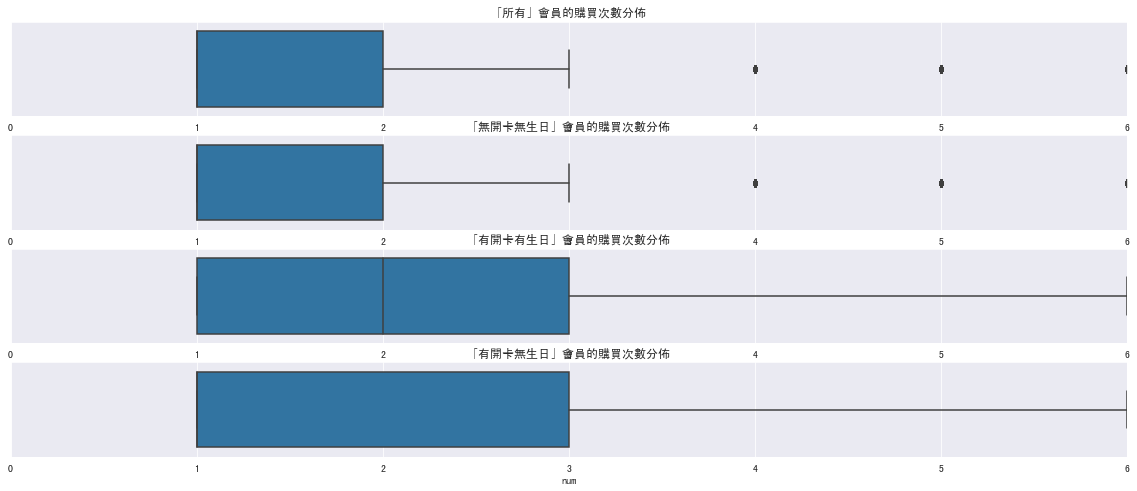

,所有,無開卡無生日,有開卡有生日,有開卡無生日
count,491950.000000,310005.000000,150550.000000,28831.000000
mean,2.109318,1.709547,2.901348,2.320419
std,2.407090,1.665742,3.313256,2.549829
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000
max,125.000000,92.000000,125.000000,87.000000


In [200]:
#從boxplot來看 
fig, ax = plt.subplots(4, 1,figsize=(20,8))
ax0 = sns.boxplot(df_nPurchase['num'],orient='h', ax=ax[0], )
ax1 = sns.boxplot(df_nPurchase[df_nPurchase['status'] == '無開卡無生日']['num'],orient='h',ax=ax[1])
ax2 = sns.boxplot(df_nPurchase[df_nPurchase['status'] == '有開卡有生日']['num'],orient='h',ax=ax[2])
ax3 = sns.boxplot(df_nPurchase[df_nPurchase['status'] == '有開卡無生日']['num'],orient='h',ax=ax[3])

#outliners沒有畫在圖裡
ax0.set_xlim([0, 6])
ax1.set_xlim([0, 6])
ax2.set_xlim([0, 6])
ax3.set_xlim([0, 6])

ax0.set_title('「所有」會員的購買次數分佈')
ax1.set_title('「無開卡無生日」會員的購買次數分佈')
ax2.set_title('「有開卡有生日」會員的購買次數分佈')
ax3.set_title('「有開卡無生日」會員的購買次數分佈')

plt.show()

#summary statistic (但有包含outliers所以略有不同)
dist_summary = df_nPurchase['num'].describe().to_frame().rename(columns={'num' : '所有'})
dist_summary['無開卡無生日'] = df_nPurchase['num'][df_nPurchase['status'] == '無開卡無生日'].describe()
dist_summary['有開卡有生日'] = df_nPurchase['num'][df_nPurchase['status'] == '有開卡有生日'].describe()
dist_summary['有開卡無生日'] = df_nPurchase['num'][df_nPurchase['status'] == '有開卡無生日'].describe()
dist_summary

#無開卡無生日：都買比較少次
#有開卡有生日：次數都比較多
#有開開無生日：介於中間


In [201]:
#三種類型，只購買一次的比例
nom1 = df_nPurchase[(df_nPurchase['num'] == 1) & (df_nPurchase['status'] == '無開卡無生日')].shape[0] 
nom2 = df_nPurchase[(df_nPurchase['num'] == 1) & (df_nPurchase['status'] == '有開卡有生日')].shape[0] 
nom3 = df_nPurchase[(df_nPurchase['num'] == 1) & (df_nPurchase['status'] == '有開卡無生日')].shape[0] 
denom1 = df_nPurchase[df_nPurchase['status'] == '無開卡無生日'].shape[0] 
denom2 = df_nPurchase[df_nPurchase['status'] == '有開卡有生日'].shape[0] 
denom3 = df_nPurchase[df_nPurchase['status'] == '有開卡無生日'].shape[0]
pct1 = nom1/denom1 #無開卡無生日，只消費一次的比例
pct2 = nom2/denom2 #有開卡有生日，只消費一次的比例
pct3 = nom3/denom3 #有開卡無生日，只消費一次的比例
print("{:.2%}".format(pct1), "{:.2%}".format(pct2), "{:.2%}".format(pct3))


67.40% 41.90% 51.03%


In [57]:
df_nPurchase

,MemberId,status,num,num_binned
0,1362,有開卡有生日,4,4
1,1384,無開卡無生日,6,6
2,1391,有開卡無生日,25,25
3,1400,無開卡無生日,1,1
4,1423,無開卡無生日,2,2
5,1448,無開卡無生日,29,26-100
6,1469,有開卡有生日,27,26-100
7,1474,無開卡無生日,3,3
8,1490,有開卡有生日,14,14
9,1498,有開卡有生日,6,6
